# Data Cleaning

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)

In [2]:
data = pd.read_csv('data/owid-co2-data.csv')
df = data
print(df.shape)
df.head()

(24016, 38)


,iso_code,country,year,co2,co2_growth_prct,co2_growth_abs,consumption_co2,trade_co2,trade_co2_share,co2_per_capita,consumption_co2_per_capita,share_global_co2,cumulative_co2,share_global_cumulative_co2,co2_per_gdp,consumption_co2_per_gdp,co2_per_unit_energy,cement_co2,coal_co2,flaring_co2,gas_co2,oil_co2,cement_co2_per_capita,coal_co2_per_capita,flaring_co2_per_capita,gas_co2_per_capita,oil_co2_per_capita,total_ghg,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,primary_energy_consumption,energy_per_capita,energy_per_gdp,population,gdp
0,AFG,Afghanistan,1949,0.015,NaN,NaN,NaN,NaN,NaN,0.002,NaN,0.000,0.015,0.000,NaN,NaN,NaN,0.0,0.015,0.0,0.0,0.000,0.0,0.002,0.0,0.0,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7663783.0,NaN
1,AFG,Afghanistan,1950,0.084,475.000,0.070,NaN,NaN,NaN,0.011,NaN,0.001,0.099,0.001,0.004,NaN,NaN,0.0,0.022,0.0,0.0,0.066,0.0,0.003,0.0,0.0,0.009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7752000.0,1.949480e+10
2,AFG,Afghanistan,1951,0.092,8.696,0.007,NaN,NaN,NaN,0.012,NaN,0.001,0.191,0.001,0.005,NaN,NaN,0.0,0.026,0.0,0.0,0.066,0.0,0.003,0.0,0.0,0.008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7840000.0,2.006385e+10
3,AFG,Afghanistan,1952,0.092,0.000,0.000,NaN,NaN,NaN,0.012,NaN,0.001,0.282,0.001,0.004,NaN,NaN,0.0,0.033,0.0,0.0,0.062,0.0,0.004,0.0,0.0,0.008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7936000.0,2.074235e+10
4,AFG,Afghanistan,1953,0.106,16.000,0.015,NaN,NaN,NaN,0.013,NaN,0.002,0.388,0.001,0.005,NaN,NaN,0.0,0.037,0.0,0.0,0.066,0.0,0.005,0.0,0.0,0.008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8040000.0,2.201546e+10


In [3]:
#Only include data from 1950 and later
df = df[df['year']>=1950]

In [4]:
#Drop columns with >8K null values (50% of data)
df.dropna(axis=1,thresh=8000, inplace=True)


In [5]:
#Drop continents, identified by lacking an ISO code
df.dropna(axis=0,subset=['iso_code'],inplace=True)

#Drop "World" entries
df = df[df.country != 'World']
df.shape

(14404, 19)

**plot dotted line after Indonesia**

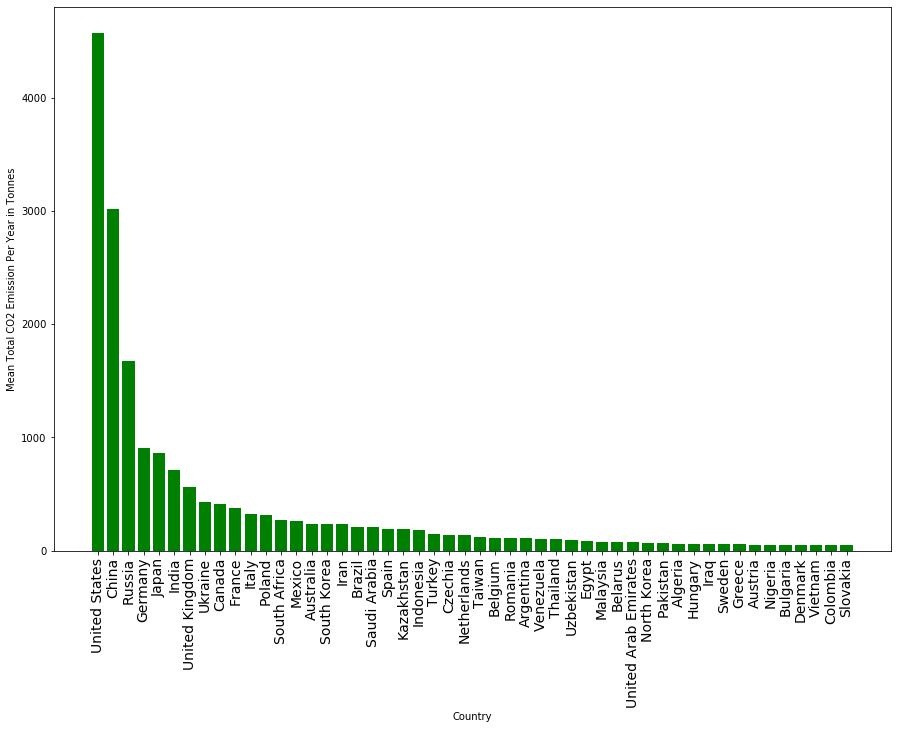

In [6]:
#Visualize top 50 total CO2 emissions by country (note: fix size to make more legible)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,10))
plt.bar(x = df.groupby(['country'])['co2'].mean().sort_values(ascending=False).index[:50],
        height = df.groupby(['country'])['co2'].mean().sort_values(ascending=False)[:50],
       color = 'green')
plt.xlabel('Country')
plt.ylabel('Mean Total CO2 Emission Per Year in Tonnes')
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
    # specify integer or one of preset strings, e.g.
    #tick.label.set_fontsize('x-small')
    tick.label.set_rotation('vertical')

In [7]:
#Look at top 50 total CO2 emission values by country to determine cut-off point
df.groupby(['country'])['co2'].mean().sort_values(ascending=False)[:50]

country
United States           4572.443145
China                   3020.410884
Russia                  1678.672633
Germany                  907.555435
Japan                    862.353855
India                    711.136391
United Kingdom           562.317333
Ukraine                  431.599350
Canada                   408.196348
France                   380.734435
Italy                    323.503725
Poland                   315.624159
South Africa             273.030304
Mexico                   263.238609
Australia                239.099464
South Korea              239.019536
Iran                     238.637420
Brazil                   208.254638
Saudi Arabia             207.846739
Spain                    191.898884
Kazakhstan               190.311700
Indonesia                178.857464
Turkey                   143.218507
Czechia                  140.431083
Netherlands              139.889377
Taiwan                   117.495261
Belgium                  111.949609
Romania             

In [8]:
#Create df of top 10 CO2 emmiters per capita, of the top 22 total CO2 emmiters
#Cut off at 22 after Indonesia above due to local dropoff point
top22_co2 = list(df.groupby(['country'])['co2'].mean().sort_values(ascending=False)[:22].index)
df_top22_co2 = df.loc[df['country'].isin(top22_co2)]
top10_percapita = list(df_top22_co2.groupby(['country'])['co2_per_capita'].mean().sort_values(ascending=False)[:10].index)
print(top10_percapita)


['United States', 'Canada', 'Australia', 'Kazakhstan', 'Russia', 'Germany', 'Saudi Arabia', 'United Kingdom', 'Poland', 'Ukraine']


Text(0, 0.5, 'Mean CO2 Emission Per Year Per Capita in Tonnes')

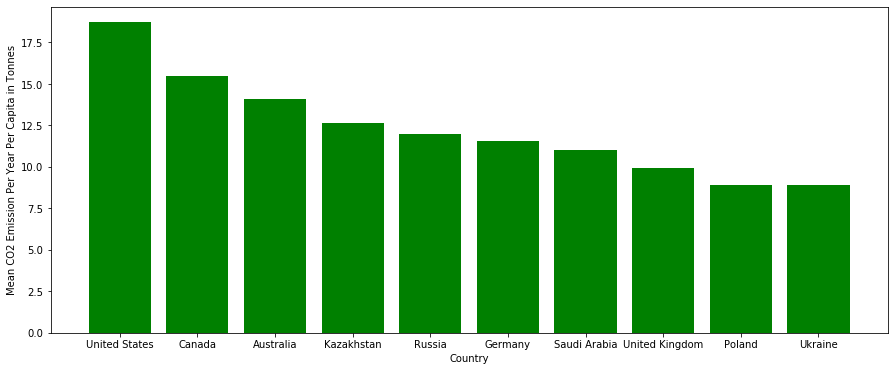

In [9]:
df_top10 = df.loc[df['country'].isin(top10_percapita)]
fig, ax = plt.subplots(figsize=(15,6))
plt.bar(x = df_top10.groupby(['country'])['co2_per_capita'].mean().sort_values(ascending=False).index,
        height = df_top10.groupby(['country'])['co2_per_capita'].mean().sort_values(ascending=False),
       color = 'green')
plt.xlabel('Country')
plt.ylabel('Mean CO2 Emission Per Year Per Capita in Tonnes')

# Time Series Model for USA

**EDA for USA**

In [10]:
#Reload original df to get pre-1950 USA data
df_USA = data

#Only include USA co2_per_capita data post-1800 (lacking data before this date)
df_USA = df_USA[df_USA['year'] >= 1800]
df_USA = df_USA[df_USA['country'] == 'United States']
df_USA = df_USA[['year','co2_per_capita']]

print(df_USA.shape)

(219, 2)


In [60]:
df_USA['year'] = pd.to_datetime(df_USA['year'],format='%Y')
df_USA.set_index('year', inplace=True)
## Sanity Check
# df_USA.head()

KeyError: 'year'

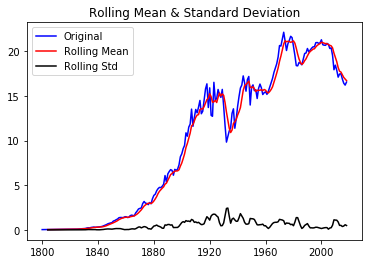

In [15]:
roll_mean = df_USA.rolling(window=5, center=False).mean()
roll_std = df_USA.rolling(window=5, center=False).std()

plt.plot(df_USA,color='blue', label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

### Addressing Trends and Stationarity

**Log Transformation**

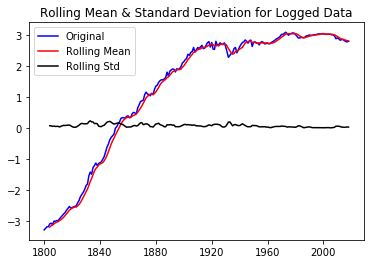

In [16]:
#Log transformation to address lack of variance and covariance
from math import exp
from numpy import log
log_USA = log(df_USA)

roll_mean_log = log_USA.rolling(window=5, center=False).mean()
roll_std_log = log_USA.rolling(window=5, center=False).std()

plt.plot(log_USA,color='blue', label='Original')
plt.plot(roll_mean_log, color='red', label='Rolling Mean')
plt.plot(roll_std_log, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation for Logged Data')
plt.show(block=False)

In [17]:
#Dickey_Fuller test on log data
#Dickey_Fuller test on rolling mean of log data yielded p value of 0.003,
#so we disregarded as less significant than other options

from statsmodels.tsa.stattools import adfuller

test = adfuller(log_USA['co2_per_capita'][1:-1])
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
dfoutput


Test Statistic                  -3.807340
p-value                          0.002833
#Lags Used                       3.000000
Number of Observations Used    213.000000
dtype: float64

**Differencing**

In [61]:
#Get differenced values of original dataset to compare Dickey-Fuller p-value to log data
diff = df_USA.diff().rename(index=str, columns={"co2_per_capita": "Differenced Observations"})

#Dickey-Fuller test on differenced data
test = adfuller(diff['Differenced Observations'][1:-1])
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
dfoutput


Test Statistic                  -4.055314
p-value                          0.001147
#Lags Used                      11.000000
Number of Observations Used    205.000000
dtype: float64

### Model Logged and Original Data

#### Logged Data

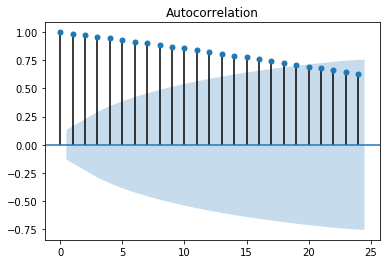

In [19]:
#ACF for logged data
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(log_USA[:-1], alpha=.05);

##NOTE: data is geometric! (indicates AR)

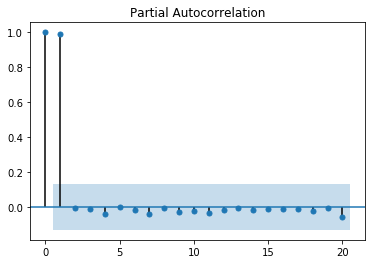

In [20]:
#PACF for logged data
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(log_USA[:-1], alpha=.05, lags=20);

##NOTE: lag of 1 is significant

In [21]:
#Instantiate ARIMA model for log
#Tried many parameters and the below were by far the best

from statsmodels.tsa.arima_model import ARIMA

#fit model
log_mod = ARIMA(log_USA[:-1], order=(2,0,0)) # p,d,q
log_mod_fit = log_mod.fit()
print(log_mod_fit.summary())
##NOTE: Check out coef and p-value - 

/Users/candaur/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:         co2_per_capita   No. Observations:                  218
Model:                     ARMA(2, 0)   Log Likelihood                 240.613
Method:                       css-mle   S.D. of innovations              0.079
Date:                Thu, 28 Jan 2021   AIC                           -473.226
Time:                        10:42:13   BIC                           -459.688
Sample:                    01-01-1800   HQIC                          -467.758
                         - 01-01-2017                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1865      2.927     -0.064      0.949      -5.924       5.551
ar.L1.co2_per_capita     1.1387      0.022     51.069      0.000       1.095       1.182
ar.L2.co2_pe

#### Original Data

Will incorporate differenced data through d parameter in the ARIMA model

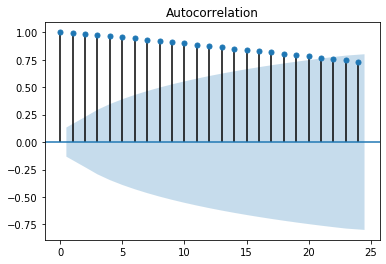

In [22]:
#ACF for original data
plot_acf(df_USA[:-1], alpha=.05);

##NOTE: data is geometric! (indicates AR)

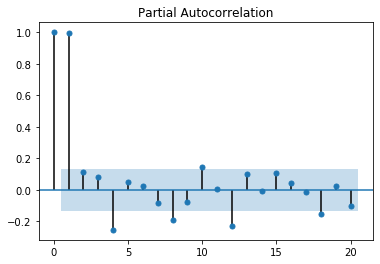

In [23]:
#PACF for original data
plot_pacf(df_USA[:-1], alpha=.05, lags=20);

##NOTE: lag of 1 is significant

## Fitting ARIMA Model
Exploring different parameters to find best p-value


In [24]:
from statsmodels.tsa.arima_model import ARIMA

#fit model
mod123 = ARIMA(df_USA[:-1], order=(1,2,3)) # p,d,q
mod123_fit = mod123.fit()
print(mod123_fit.summary())
##NOTE: Check out coef and p-value - 

/Users/candaur/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/Users/candaur/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:      D2.co2_per_capita   No. Observations:                  216
Model:                 ARIMA(1, 2, 3)   Log Likelihood                -249.331
Method:                       css-mle   S.D. of innovations              0.761
Date:                Thu, 28 Jan 2021   AIC                            510.663
Time:                        10:42:15   BIC                            530.915
Sample:                    01-01-1802   HQIC                           518.845
                         - 01-01-2017                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0006      0.001     -0.425      0.671      -0.003       0.002
ar.L1.D2.co2_per_capita    -0.7431      0.113     -6.549      0.000      -0.965      -0.521


In [25]:
#fit model
mod420 = ARIMA(df_USA[:-1], order=(4,2,0)) # p,d,q
mod420_fit = mod420.fit(disp=0)
print(mod420_fit.summary())
##NOTE: Check out coef and p-value - 

/Users/candaur/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/Users/candaur/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:      D2.co2_per_capita   No. Observations:                  216
Model:                 ARIMA(4, 2, 0)   Log Likelihood                -264.456
Method:                       css-mle   S.D. of innovations              0.821
Date:                Thu, 28 Jan 2021   AIC                            540.912
Time:                        10:42:16   BIC                            561.164
Sample:                    01-01-1802   HQIC                           549.094
                         - 01-01-2017                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0015      0.017     -0.088      0.930      -0.036       0.033
ar.L1.D2.co2_per_capita    -0.9221      0.067    -13.798      0.000      -1.053      -0.791


In [26]:
#fit model
mod520 = ARIMA(df_USA[:-1], order=(5,2,0)) # p,d,q
mod520_fit = mod520.fit(disp=0)
print(mod520_fit.summary())
##NOTE: Check out coef and p-value - 

/Users/candaur/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/Users/candaur/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:      D2.co2_per_capita   No. Observations:                  216
Model:                 ARIMA(5, 2, 0)   Log Likelihood                -260.117
Method:                       css-mle   S.D. of innovations              0.804
Date:                Thu, 28 Jan 2021   AIC                            534.233
Time:                        10:42:17   BIC                            557.860
Sample:                    01-01-1802   HQIC                           543.778
                         - 01-01-2017                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0014      0.014     -0.102      0.919      -0.029       0.026
ar.L1.D2.co2_per_capita    -0.9588      0.067    -14.395      0.000      -1.089      -0.828


# Determine Best Model

## AIC

In [27]:
AIC_123 = mod123_fit.aic
AIC_420 = mod420_fit.aic
AIC_520 = mod520_fit.aic
AIC_log = log_mod_fit.aic


print(AIC_123)
print(AIC_420)
print(AIC_520)
print(AIC_log)

510.66296979531074
540.9121676189329
534.2330383660093
-473.2258980362311


Based on the above AIC values, our ARIMA model of the logged data seems to be the optimal model. We will confirm next by checking RMSE values.

In [28]:
#train test split for log data

#Split 90% of data into train
X = log_USA.index
y = log_USA['co2_per_capita']

train = log_USA.loc[:'1997-01-01']
test = log_USA.loc['1997-01-01':]

X_train, X_test = train.index , test.index
y_train, y_test = train['co2_per_capita'] , test['co2_per_capita']


In [29]:
mod_log = ARIMA(train[2:], order=(2,0,0)) # p,d,q
mod_log_fit = mod_log.fit()

/Users/candaur/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


In [30]:
mod_log_fit

In [31]:
start = len(y_train) -1
end = len(y_train) + len(y_test)

pred_log = mod_log_fit.predict(start='1997-01-01', end='2018-01-01', dynamic=False)

## RMSE

### Train-Test Split

In [33]:
#Split 90% of data into train
diff = df_USA.diff().rename(index=str, columns={"co2_per_capita": "Differenced Observations"})
diff2 = diff.diff().rename(index=str, columns={"co2_per_capita": "Differenced Observations"})


X = diff2.index
y = diff2['Differenced Observations']

train = diff2.loc[:'1997-01-01']
test = diff2.loc['1997-01-01':]

X_train, X_test = train.index , test.index
y_train, y_test = train['Differenced Observations'] , test['Differenced Observations']


In [34]:
train.head()

,Differenced Observations
year,
1800-01-01 00:00:00,NaN
1801-01-01 00:00:00,NaN
1802-01-01 00:00:00,0.000
1803-01-01 00:00:00,-0.002
1804-01-01 00:00:00,0.004


In [55]:
mod520 = ARIMA(y_train[2:], order=(5,2,0)) # p,d,q
mod520_fit = mod520.fit()

/Users/candaur/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/Users/candaur/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


In [57]:
pred520 = mod520_fit.predict(start='1997-01-01', end='2018-01-01', dynamic=False)


# SAY WHAT.

In [36]:
pred420 = mod420_fit.predict(start='1997-01-01', end='2018-01-01', dynamic=False)


In [58]:
RMSE_520 = np.sqrt(((pred520-y_test)**2).mean())
RMSE_520

0.725163415202824

In [ ]:
RMSE_log = np.sqrt(((pred_log-y_test)**2).mean())
RMSE_log

In [35]:
mod420 = ARIMA(y_train[2:], order=(4,2,0)) # p,d,q
mod420_fit = mod420.fit()

/Users/candaur/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/Users/candaur/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


# SAY WHAT.

In [36]:
start = len(y_train) -1
end = len(y_train) + len(y_test)


pred420 = mod420_fit.predict(start='1997-01-01', end='2018-01-01', dynamic=False)


In [37]:
# #Testing

# pred420 = mod420_fit.predict(start=start, end=end, dynamic=False)

In [38]:
len(pred420)

22

In [39]:
list(pred420.values)

[-0.9584684046237504,
 0.19861851482788714,
 0.714511891029353,
 -0.8029985912689124,
 0.22362010214362993,
 0.21197875984427073,
 -0.14503968470494388,
 -0.08099508377571774,
 0.07551226073118322,
 0.11214532150028991,
 -0.19002013110602245,
 0.06746456678698565,
 0.08302516754377412,
 -0.0976246571487768,
 0.014168528237780042,
 0.03642284169417309,
 -0.008440053078234356,
 -0.03062893832459009,
 0.02246626504149268,
 0.015591542596593759,
 -0.030205221729172577,
 0.010952781404645812]

In [40]:
pred420.reindex(list(range(1997,2019)))

1997   NaN
1998   NaN
1999   NaN
2000   NaN
2001   NaN
2002   NaN
2003   NaN
2004   NaN
2005   NaN
2006   NaN
2007   NaN
2008   NaN
2009   NaN
2010   NaN
2011   NaN
2012   NaN
2013   NaN
2014   NaN
2015   NaN
2016   NaN
2017   NaN
2018   NaN
dtype: float64

In [41]:
pd.Series(list(pred420.values),index=list(range(1997,2019)))

1997   -0.958468
1998    0.198619
1999    0.714512
2000   -0.802999
2001    0.223620
2002    0.211979
2003   -0.145040
2004   -0.080995
2005    0.075512
2006    0.112145
2007   -0.190020
2008    0.067465
2009    0.083025
2010   -0.097625
2011    0.014169
2012    0.036423
2013   -0.008440
2014   -0.030629
2015    0.022466
2016    0.015592
2017   -0.030205
2018    0.010953
dtype: float64

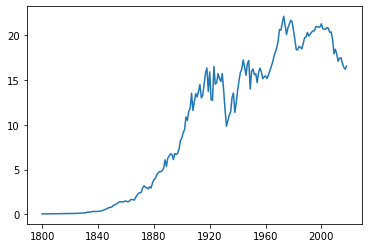

In [42]:
plt.plot(df_USA)

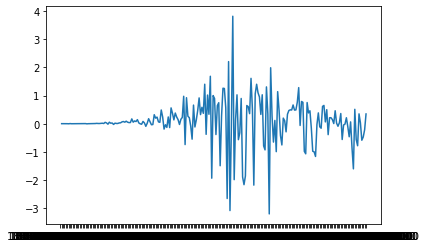

In [43]:
plt.plot(diff)

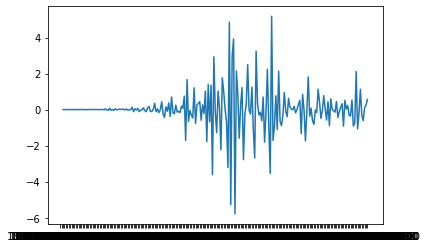

In [44]:
plt.plot(diff2)

In [45]:
from numpy import log

log(df_USA)


,co2_per_capita
year,
1800-01-01,-3.296837
1801-01-01,-3.244194
1802-01-01,-3.194183
1803-01-01,-3.194183
1804-01-01,-3.101093
...,...
2014-01-01,2.861343
2015-01-01,2.827314
2016-01-01,2.798987


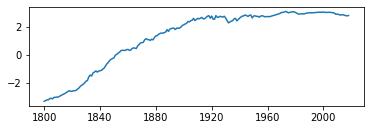

In [46]:
from math import exp
from numpy import log
transform = log(df_USA)
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(transform)


**AIC and RMSE**

In [59]:
RMSE_520 = np.sqrt(((pred-y_test)**2).mean())
RMSE_520

NameError: name 'pred' is not defined

In [54]:
RMSE_log = np.sqrt(((pred_log-y_test)**2).mean())
RMSE_log

3.1167130056556056

In [49]:
RMSE_420 = np.sqrt(((pred420-y_test)**2).mean())
RMSE_420

0.8080931747605845

**Exploring best model**

In [ ]:
# Visualize residuals/error
residuals_123 = pd.DataFrame(mod123_fit.resid)
residuals_123.plot()
pyplot.show();


In [ ]:
# Check for linearity
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(kind='kde')
pyplot.show()

In [ ]:
# Visualize prediction
mod123_fit.plot_predict();


In [ ]:
model_fit.forecast()[0] # 0 indicates the very next value the model predicts??


# Additional Notes

In [ ]:
y_test.diff(1)

In [ ]:
#choose top 50 countries by co2 emissions (not per capita)
#time series based on co2 emissions (not per capita)
#observe per capita data via visualizations

**Tuesday**

-Initial time series model (check for stationarity/trends, fix if not)--top 10 countries (not per capita)

-Vizualizations for top 10 countries per capita

**Wednesday**

-Fix whatever needs fixing

-Other EDA/visualizations

-Tune final model

**Thursday**

-Tune final model (if not done by Wed)

-Create Read Me, PPT presentation

-Clean up code

-Practice presentation

**Stretch Goals**

-Research peaks and valleys historically

-Compare to world emissions


In [ ]:
for country in top10_percapita:
    